# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
#!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

temperature = []
humidity = []
wind_speed = []
clouds = []
country = []
date = []
lat = []
lng = []
city_name = []
record = 0

for city in cities:
    city_url = url + "&q=" + city
    record +=1
    print("processing record " + str(record))
  
    
    try:
        results = requests.get (city_url).json()
        #print(results)
        temperature.append(results["main"]["temp_max"])
        humidity.append(results["main"]["humidity"])
        wind_speed.append(results["wind"]["speed"])
        clouds.append(results["clouds"]["all"])
        country.append(results["sys"]["country"])
        date.append(results["dt"])
        lat.append(results["coord"]["lat"])
        lng.append(results["coord"]["lon"])
        city_name.append(city)
        
    except:
        print("could not find " + city)

processing record 1
processing record 2
processing record 3
processing record 4
processing record 5
processing record 6
processing record 7
processing record 8
processing record 9
processing record 10
processing record 11
processing record 12
processing record 13
processing record 14
processing record 15
processing record 16
processing record 17
processing record 18
processing record 19
processing record 20
processing record 21
processing record 22
processing record 23
processing record 24
processing record 25
processing record 26
processing record 27
processing record 28
processing record 29
processing record 30
processing record 31
processing record 32
processing record 33
could not find illoqqortoormiut
processing record 34
processing record 35
processing record 36
processing record 37
processing record 38
processing record 39
processing record 40
processing record 41
processing record 42
processing record 43
processing record 44
processing record 45
processing record 46
processing 

could not find tumannyy
processing record 340
processing record 341
processing record 342
could not find cockburn harbour
processing record 343
processing record 344
processing record 345
could not find saleaula
processing record 346
processing record 347
processing record 348
processing record 349
processing record 350
processing record 351
processing record 352
processing record 353
processing record 354
processing record 355
processing record 356
processing record 357
processing record 358
processing record 359
processing record 360
could not find barawe
processing record 361
processing record 362
processing record 363
processing record 364
could not find mocambique
processing record 365
processing record 366
processing record 367
could not find yusva
processing record 368
processing record 369
processing record 370
processing record 371
processing record 372
processing record 373
processing record 374
processing record 375
processing record 376
processing record 377
processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({"City": city_name,
                       "Lat": lat,
                       "Lng": lng,
                       "Max Temp": temperature,
                       "Humidity": humidity,
                       "Cloudiness": clouds,
                       "Wind Speed": wind_speed,
                       "Country": country,
                       "Date": date})


city_df.to_csv(output_data_file)
city_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,52.00,71,0,1.01,ZA,1604108391
1,motema,8.60,-11.03,70.20,85,39,0.47,SL,1604108981
2,gamba,-2.65,10.00,75.13,93,100,4.85,GA,1604108982
3,kununurra,-15.77,128.73,95.00,44,92,4.70,AU,1604108982
4,maceio,-9.67,-35.74,75.20,94,75,4.70,BR,1604108568
...,...,...,...,...,...,...,...,...,...
548,chunhuhub,19.55,-88.68,72.64,99,95,4.16,MX,1604109127
549,fershampenuaz,53.52,59.81,36.68,78,99,9.48,RU,1604109127
550,san bartolome de tirajana,27.92,-15.57,77.00,31,0,4.70,ES,1604109127
551,la cruz,23.92,-106.90,75.99,74,49,1.01,MX,1604109128


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
city_df.describe()
#the maximum humidity is 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.00000,553.000000,5.530000e+02
mean,21.731790,14.906655,56.891049,74.358047,51.16094,7.449602,1.604109e+09
std,32.961179,89.025504,21.667219,19.939633,40.50659,6.065167,2.359106e+02
min,-54.800000,-179.170000,-10.890000,15.000000,0.00000,0.430000,1.604108e+09
25%,-5.530000,-62.070000,42.800000,64.000000,2.00000,3.150000,1.604109e+09
50%,27.900000,21.550000,60.800000,80.000000,55.00000,5.820000,1.604109e+09
75%,49.820000,91.820000,75.290000,89.000000,93.00000,10.130000,1.604109e+09
max,78.220000,179.320000,95.000000,100.000000,100.00000,46.080000,1.604109e+09


In [25]:
#  Get the indices of cities that have humidity over 100%.
drop_list = city_df.index[city_df["Humidity"]>100].tolist()
drop_list

[]

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_df = city_df.drop(drop_list)
city_df = city_df.reset_index(drop=True)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,52.00,71,0,1.01,ZA,1604108391
1,motema,8.60,-11.03,70.20,85,39,0.47,SL,1604108981
2,gamba,-2.65,10.00,75.13,93,100,4.85,GA,1604108982
3,kununurra,-15.77,128.73,95.00,44,92,4.70,AU,1604108982
4,maceio,-9.67,-35.74,75.20,94,75,4.70,BR,1604108568
...,...,...,...,...,...,...,...,...,...
548,chunhuhub,19.55,-88.68,72.64,99,95,4.16,MX,1604109127
549,fershampenuaz,53.52,59.81,36.68,78,99,9.48,RU,1604109127
550,san bartolome de tirajana,27.92,-15.57,77.00,31,0,4.70,ES,1604109127
551,la cruz,23.92,-106.90,75.99,74,49,1.01,MX,1604109128


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
#get the scatter plot from the activities.

## Latitude vs. Temperature Plot

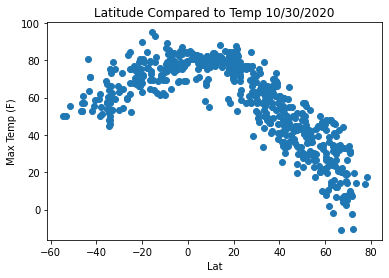

In [20]:
# Generate a scatter plot of Latitude vs. Temperature

#plot scatter plot
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title("Latitude Compared to Temp 10/30/2020")
plt.savefig("Images/lat-temp-scatter.png")
plt.show()

## Latitude vs. Humidity Plot

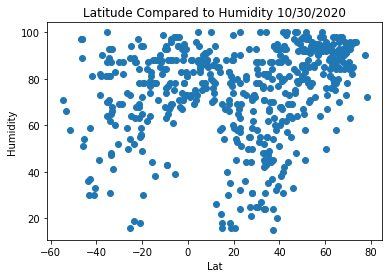

In [21]:
# Generate a scatter plot of Latitude vs. Humidity

#plot scatter plot
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude Compared to Humidity 10/30/2020")
plt.savefig("Images/lat-hum-scatter.png")
plt.show()

## Latitude vs. Cloudiness Plot

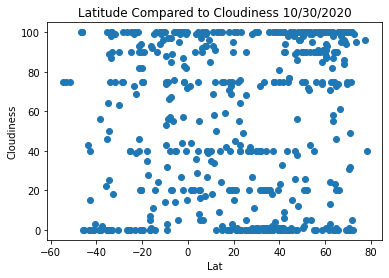

In [22]:
# Generate a scatter plot of Latitude vs. Cloudiness

#plot scatter plot
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude Compared to Cloudiness 10/30/2020")
plt.savefig("Images/lat-cloud-scatter.png")
plt.show()

## Latitude vs. Wind Speed Plot

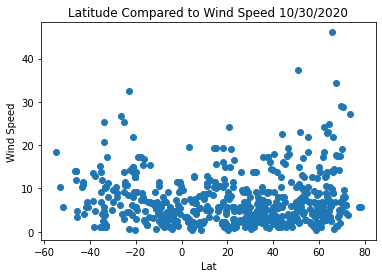

In [23]:
# Generate a scatter plot of Latitude vs. Wind Speed

#plot scatter plot
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude Compared to Wind Speed 10/30/2020")
plt.savefig("Images/lat-wind-scatter.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

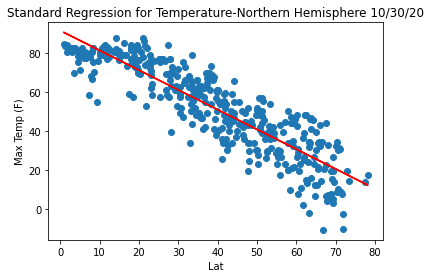

In [35]:
northern_df = city_df.loc[city_df["Lat"]>=0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(northern_df["Lat"], northern_df["Max Temp"])
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")


# Add the linear regression equation and line to plot
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title("Standard Regression for Temperature-Northern Hemisphere 10/30/20")
plt.savefig("Images/lat-temp-lin-reg-north.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

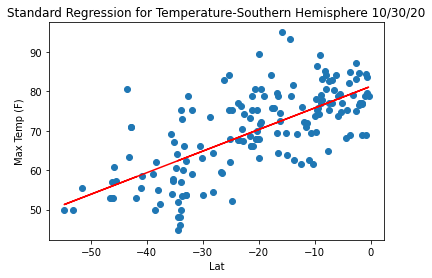

In [36]:
southern_df = city_df.loc[city_df["Lat"]<0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(southern_df["Lat"], southern_df["Max Temp"])
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")


# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title("Standard Regression for Temperature-Southern Hemisphere 10/30/20")
plt.savefig("Images/lat-temp-lin-reg-south.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

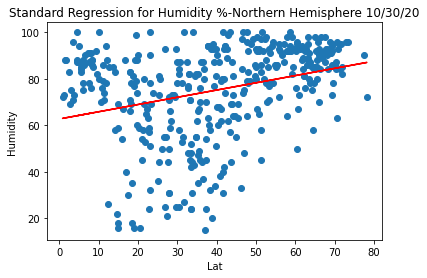

In [37]:
northern_df = city_df.loc[city_df["Lat"]>=0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(northern_df["Lat"], northern_df["Humidity"])
plt.xlabel("Lat")
plt.ylabel("Humidity")


# Add the linear regression equation and line to plot
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Standard Regression for Humidity %-Northern Hemisphere 10/30/20")
plt.savefig("Images/lat-hum-lin-reg-north.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

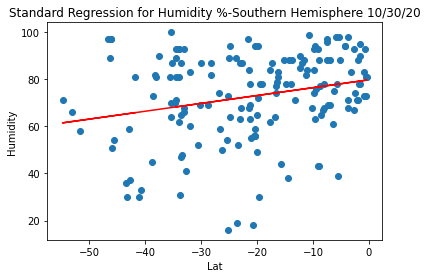

In [38]:
southern_df = city_df.loc[city_df["Lat"]<0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(southern_df["Lat"], southern_df["Humidity"])
plt.xlabel("Lat")
plt.ylabel("Humidity")

# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Standard Regression for Humidity %-Southern Hemisphere 10/30/20")
plt.savefig("Images/lat-hum-lin-reg-south.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

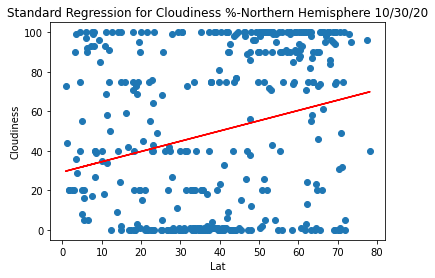

In [39]:
northern_df = city_df.loc[city_df["Lat"]>=0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")

# Add the linear regression equation and line to plot
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Standard Regression for Cloudiness %-Northern Hemisphere 10/30/20")
plt.savefig("Images/lat-cloud-lin-reg-north.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

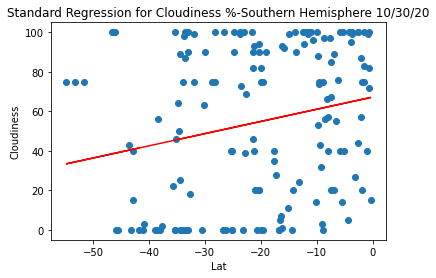

In [40]:
southern_df = city_df.loc[city_df["Lat"]<0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")


# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Standard Regression for Cloudiness %-Southern Hemisphere 10/30/20")
plt.savefig("Images/lat-cloud-lin-reg-south.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

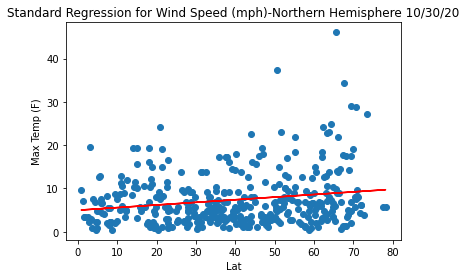

In [41]:
northern_df = city_df.loc[city_df["Lat"]>=0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")

# Add the linear regression equation and line to plot
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title("Standard Regression for Wind Speed (mph)-Northern Hemisphere 10/30/20")
plt.savefig("Images/lat-wind-lin-reg-north.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

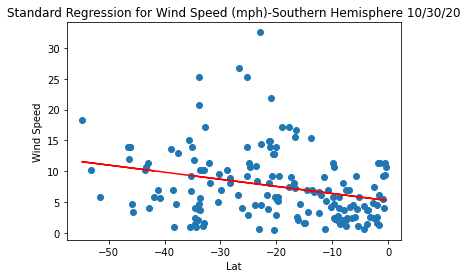

In [42]:
southern_df = city_df.loc[city_df["Lat"]<0]
# Generate a scatter plot of Latitude vs. Temperature
#plot scatter plot
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")


# Add the linear regression equation and line to plot
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Standard Regression for Wind Speed (mph)-Southern Hemisphere 10/30/20")
plt.savefig("Images/lat-wind-lin-reg-south.png")
plt.show()